In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

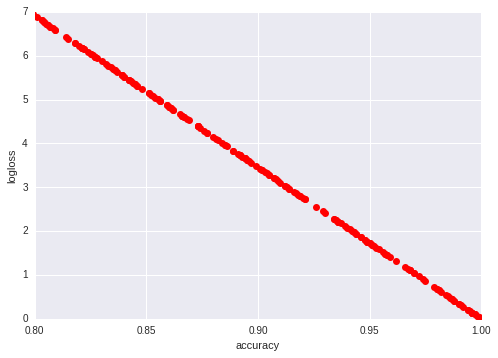

In [2]:
# просто график зависимости logloss от accuracy на наборах случайных данных
# не имеет отношения к тому, что выше или ниже

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

larray, aarray = [], []
ASIZE = 1000

for i in range(1000):
    #y = np.random.randint(0, 2, (ASIZE))
    #out = np.random.randint(0, 2, (ASIZE))
    
    k = np.random.randint(0, ASIZE)
    y = np.zeros((ASIZE))
    out = np.append(np.zeros(k), np.ones(ASIZE-k))
    
    ll = log_loss(y, out, labels = (0, 1))
    accuracy = np.mean(np.equal(y, out).astype(int))
    
    larray.append(ll)
    aarray.append(accuracy)

plt.plot(aarray, larray, 'ro')
plt.axis([0.8, 1, 0, 7])
plt.xlabel('accuracy')
plt.ylabel('logloss')
#plt.show()

In [3]:
# для себя, чтобы не забывать

all_params = ["maxPlayerLevel",
              "numberOfAttemptedLevels",
              "attemptsOnTheHighestLevel",
              "totalNumOfAttempts",
              "averageNumOfTurnsPerCompletedLevel",
              "doReturnOnLowerLevels",
              "numberOfBoostersUsed",
              "fractionOfUsefullBoosters",
              "totalScore",
              "totalBonusScore",
              "totalStarsCount",
              "numberOfDaysActuallyPlayed",
]

In [39]:
# оригинальный трейнсет
x_train_original = pd.read_csv("data/x_train.csv", delimiter=";", dtype=np.float32)

# оригинальные ответы к трейнсету
y_train_original = pd.read_csv("data/y_train.csv", delimiter=";", header=None,
                      names=["returned"], dtype=np.float32)

# оригинальный тестсет
x_test_original = pd.read_csv("data/x_test.csv", delimiter=";", dtype=np.float32)

# датафрейм из оригинального трейнсета с ответами в колонке returned
x_y_train_original = pd.concat([x_train_original, y_train_original], axis=1)

# датафрейм из оригинальных трейнсетов и тестсетов без ответов
x_train_test_original = pd.concat([x_train_original, x_test_original], axis=0, ignore_index=True)

# датафрейм из оригинальных трейнсетов и тестсетов с ответами для трейна и NaN для теста
x_y_train_test_original = pd.concat([x_train_test_original, y_train_original], axis=1)

# далее мы будем работать с одной таблицей со всеми мать ее данными x_y_train_test_original
# и искренне надеяться что правильно ее сгенерили
# переназовем ее xytt

xytt = x_y_train_test_original

# а также заведем таблицу, куда будем дописывать наши идиотские новые колонки, xytt Extended

xytte = xytt.copy()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed,returned
0,39.0,10.0,3.0,17.0,24.444445,1.0,5.0,0.400000,2650000.0,1375.0,21.0,2.0,0.0
1,21.0,22.0,19.0,55.0,17.045454,1.0,6.0,0.333333,5614000.0,3825.0,51.0,4.0,1.0
2,5.0,6.0,1.0,6.0,8.400000,0.0,1.0,1.000000,857000.0,1150.0,14.0,1.0,1.0
3,21.0,2.0,5.0,6.0,19.000000,0.0,1.0,0.000000,120000.0,0.0,1.0,1.0,1.0
4,4.0,5.0,1.0,5.0,9.600000,0.0,1.0,1.000000,857000.0,1075.0,12.0,1.0,0.0
5,0.0,1.0,1.0,1.0,3.000000,0.0,0.0,0.000000,113000.0,250.0,0.0,1.0,0.0
6,13.0,14.0,2.0,19.0,15.500000,0.0,5.0,0.800000,3831000.0,2875.0,34.0,2.0,1.0
7,13.0,14.0,5.0,26.0,14.769231,0.0,4.0,0.500000,3458000.0,2375.0,31.0,2.0,1.0
8,2.0,3.0,1.0,3.0,7.666667,0.0,0.0,0.000000,420000.0,750.0,6.0,1.0,0.0
9,1.0,2.0,3.0,5.0,3.000000,1.0,0.0,0.000000,113000.0,250.0,3.0,1.0,0.0


In [5]:
# сначала херанем функцию norm, которая нормализует датафрейм или колонку
norm = lambda x: (x - x.mean())/x.std()

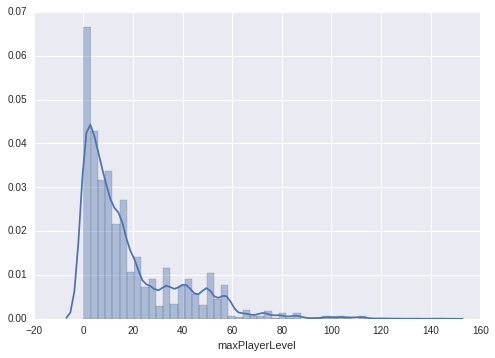

In [6]:
# сам по себе макслевел выглядит хуевенько

_ = xytte["maxPlayerLevel"]
s = sns.distplot(_)
#_.describe()

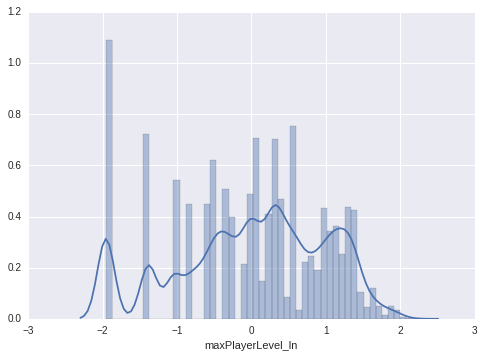

In [41]:
# поэтому слогарифмируем и отнормализуем его
xytte["maxPlayerLevel_ln"] = xytte["maxPlayerLevel"].apply(lambda x: np.log(x+1))
s = sns.distplot(norm(xytte["maxPlayerLevel_ln"]))
# лукс чуть пижже

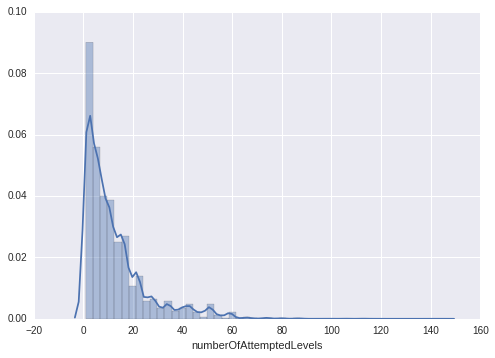

In [42]:
# второй параметр - numberOfAttemptedLevels
# выглядит он тоже не очень

s = sns.distplot(xytte["numberOfAttemptedLevels"])

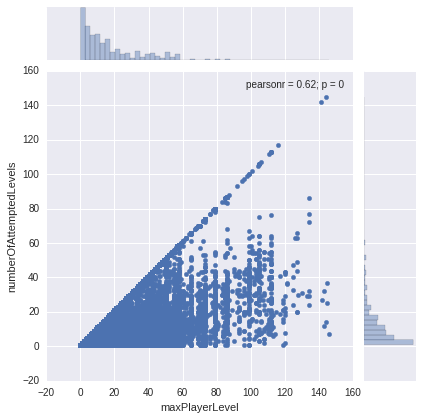

In [43]:
# проверим, зависит ли он как-то от первого

sns.jointplot(x="maxPlayerLevel", y="numberOfAttemptedLevels", data=xytte)

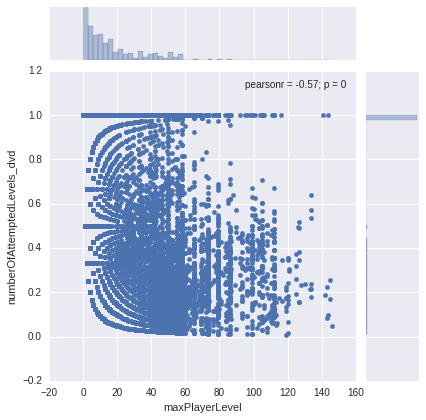

In [83]:
# оказывается, да
# может, поделить его на макслевел?

xytte["numberOfAttemptedLevels_dvd"] = (xytte["numberOfAttemptedLevels"]) / (xytte["maxPlayerLevel"] + 1)
#numberOfAttemptedLevels_dvd.columns = ["numberOfAttemptedLevels_dvd"]
sns.jointplot(x="maxPlayerLevel", y="numberOfAttemptedLevels_dvd", data=xytte)
#s = sns.distplot(norm(numberOfAttemptedLevels_dvd))
#numberOfAttemptedLevels_dvd
#xytt

maxPlayerLevel                        11305
numberOfAttemptedLevels               11305
attemptsOnTheHighestLevel             11305
totalNumOfAttempts                    11305
averageNumOfTurnsPerCompletedLevel    11305
doReturnOnLowerLevels                 11305
numberOfBoostersUsed                  11305
fractionOfUsefullBoosters             11305
totalScore                            11305
totalBonusScore                       11305
totalStarsCount                       11305
numberOfDaysActuallyPlayed            11305
returned                               5662
maxPlayerLevel_ln                     11305
numberOfAttemptedLevels_dvd           11305
numberOfAttemptedLevels_ind           11305
dtype: int64

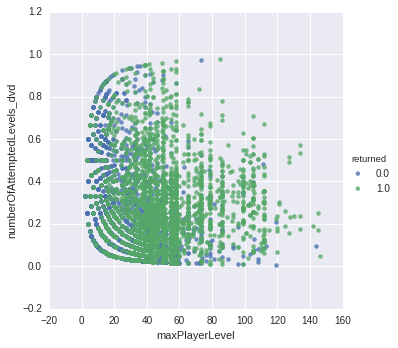

In [87]:
# первая группа людей - у которых количество попыток больше, чем максимальный уровень, причем ровно на один
# их 38 тысяч, и на них очевидно нужен какой-нибудь булевый столбец
# проверим, убрав из графика людей с нулевым макслевелом

cut = xytte[xytte["maxPlayerLevel"] > xytte["numberOfAttemptedLevels"]]
sns.lmplot(x="maxPlayerLevel", y="numberOfAttemptedLevels_dvd", data=cut, hue="returned", fit_reg=False)
cut.count()
#_ = (cut3 - 1) * 2**(xytt["numberOfAttemptedLevels"]/50) + 1
#sns.jointplot(x=xytt["numberOfAttemptedLevels"], y=_)

/usr/local/lib/python3.5/dist-packages/pandas/indexes/base.py:2683: RuntimeWarning: unorderable types: str() < int(), sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


ValueError: operands could not be broadcast together with shapes (180880,) (16,) 

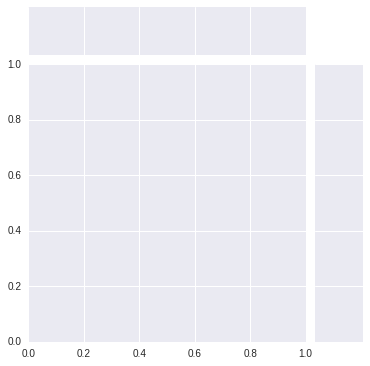

In [64]:
# a если рассмотреть только нижних чуваков
cut = xytte[xytte["numberOfAttemptedLevels_dvd"] < 1.]
sns.jointplot(x=cut["numberOfAttemptedLevels"], y=cut[""])
cut